In [2]:
from pprint import pprint 
from langchain_core.messages import AIMessage, HumanMessage
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that is right.", name="Lance"))
messages.append(AIMessage(content="Great, what would you like to learn about?", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that is right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about?
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


In [5]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI()
result = llm.invoke(messages)


In [7]:
result.content

'One of the best places to see Orcas in the US is the San Juan Islands in Washington state. The waters surrounding the islands are home to a resident population of Orcas, known as the Southern Resident killer whales. They can often be seen from the shore or on whale-watching tours in the area. Additionally, you may also have a chance to see transient Orcas passing through the area. The summer months are typically the best time to see Orcas in the San Juan Islands.'

In [9]:
from langchain_core.tools import tool

@tool 
def multiply(a: int, b: int) -> int:
    """ 
    This function is used to multiply two integers a and b.

    Args: 
        a: the first int
        b: the second int

    Returns:
        The result of the multiplication a * b
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

In [11]:
reply = llm_with_tools.invoke([HumanMessage(content=f"What is 2 times 3?", name="Lance")])

In [12]:
reply.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 3},
  'id': 'call_KWyDHvSC2WctACYppHbO0pi0',
  'type': 'tool_call'}]

In [14]:
from typing import Annotated, TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [16]:
initial_messages = [
    AIMessage(content="Hello! How can I assist you?", name="Model"),
    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What are you looking for specifically?", name="Model")

messages = add_messages(initial_messages, new_message)

In [17]:
messages

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='26725d88-ace0-4908-9802-2f2af8373566'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='422f5175-9706-4e75-9dd6-f4cf1e8d2775'),
 AIMessage(content='Sure, I can help with that. What are you looking for specifically?', additional_kwargs={}, response_metadata={}, name='Model', id='87500b80-4b1f-4efd-a033-7f083424dd09')]

In [20]:
from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph

def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(MessagesState)

builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

graph = builder.compile()


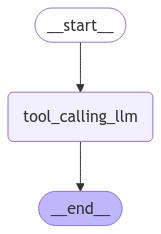

In [21]:

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
reply = graph.invoke({"messages": HumanMessage(content="What is 3 times 4?", name="Lance")})

for m in reply['messages']:
    m.pretty_print()

================================ Human Message =================================
Name: Lance

What is 3 times 4?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_tJZIRaRXB5wnyIwBRwa07ANr)
 Call ID: call_tJZIRaRXB5wnyIwBRwa07ANr
  Args:
    a: 3
    b: 4
